In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import MySQLdb

c = MySQLdb.connect(host='localhost', user='root', db='mikey')

In [2]:
df = pd.read_sql_query('select a,b from hist', c)
lil = df.head(500)

In [3]:
def histmap( df, bins=10 ):
    '''Displays a heatmap from a 2d dataframe where heatmap axes are histogram bins
     
    Args:
      df: A pandas dataframe of the columns you want to bin
      bins: A scalar or array of len 2 of bin sizes for each column in the df
    
    Raises:
      A RuntimeError if dataframe is not 2d
      
    Returns:
      A dataframe of count values. If bins=N, df will be NxN. If bins=(N,M),
      df will be NxM
    '''
    if len(df.columns) != 2:
        raise RuntimeError("This only works for 2d dataframes")
    
    mins = round(df.min())
    maxs = round(df.max())
    step = (maxs - mins)/bins
    def get_label(row):
        out={'count':0} 
        for c in df.columns:
            for x in np.linspace(mins[c], maxs[c], bins, endpoint=False):
                lo, hi = x, x + step[c]
                if row[c] >= lo and row[c] < hi:
                    out['bucket_{}'.format(c)] = '{}-{}'.format(lo, hi)
        return out
    
    grp_cols = [ 'bucket_{}'.format(c) for c in df.columns ]
    data = df.apply(get_label, axis=1, result_type='expand').groupby(grp_cols).count().unstack()
    fig,ax = plt.subplots()
    im = ax.imshow(data, cmap='magma', interpolation='nearest')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    plt.show()
    
    return data

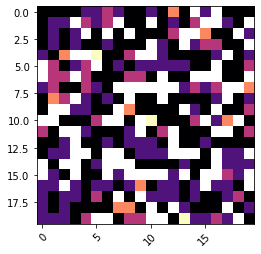

count                                                          \
bucket_b   0.0-0.5 0.5-1.0 1.0-1.5 1.5-2.0 2.0-2.5 2.5-3.0 3.0-3.5 3.5-4.0   
bucket_a                                                                     
0.0-5.0        1.0     1.0     1.0     1.0     2.0     2.0     3.0     2.0   
10.0-15.0      1.0     2.0     2.0     NaN     3.0     2.0     3.0     NaN   
15.0-20.0      1.0     2.0     1.0     2.0     NaN     1.0     NaN     1.0   
20.0-25.0      1.0     2.0     1.0     2.0     1.0     1.0     2.0     1.0   
25.0-30.0      2.0     1.0     4.0     NaN     NaN     5.0     1.0     1.0   
30.0-35.0      NaN     3.0     1.0     2.0     3.0     NaN     1.0     2.0   
35.0-40.0      NaN     3.0     3.0     NaN     3.0     1.0     1.0     1.0   
40.0-45.0      2.0     3.0     1.0     1.0     3.0     2.0     1.0     NaN   
45.0-50.0      1.0     4.0     3.0     NaN     2.0     1.0     2.0     1.0   
5.0-10.0       1.0     NaN     NaN     2.0     2.0     1.0     1.0     NaN   
50.0-55.0      NaN     NaN     1.0     1.0     1.0     3.0     NaN     NaN   
55.0-60.0      3.0     1.0     NaN     NaN     2.0     1.0     1.0     1.0   
60.0-65.0      1.0     1.0     2.0     NaN     1.0     1.0     2.0     1.0   
65.0-70.0      1.0     2.0     2.0     NaN     NaN     1.0     NaN     NaN   
70.0-75.0      NaN     1.0     NaN     NaN     1.0     2.0     NaN     NaN   
75.0-80.0      NaN     2.0     1.0     NaN     1.0     1.0     NaN     2.0   
80.0-85.0      2.0     2.0     NaN     2.0     1.0     2.0     2.0     1.0   
85.0-90.0      2.0     1.0     2.0     2.0     1.0     3.0     1.0     NaN   
90.0-95.0      2.0     1.0     2.0     1.0     1.0     1.0     1.0     4.0   
95.0-100.0     2.0     2.0     2.0     1.0     3.0     NaN     NaN     1.0   

                                                                            \
bucket_b   4.0-4.5 4.5-5.0 5.0-5.5 5.5-6.0 6.0-6.5 6.5-7.0 7.0-7.5 7.5-8.0   
bucket_a                                                                     
0.0-5.0        1.0     1.0     2.0     1.0     4.0     1.0     NaN     2.0   
10.0-15.0      1.0     1.0     NaN     1.0     2.0     1.0     3.0     NaN   
15.0-20.0      NaN     1.0     1.0     1.0     3.0     NaN     NaN     4.0   
20.0-25.0      1.0     1.0     NaN     2.0     1.0     NaN     2.0     3.0   
25.0-30.0      3.0     NaN     NaN     2.0     1.0     1.0     1.0     1.0   
30.0-35.0      1.0     2.0     2.0     2.0     2.0     2.0     1.0     1.0   
35.0-40.0      3.0     3.0     1.0     NaN     1.0     1.0     NaN     NaN   
40.0-45.0      NaN     NaN     NaN     NaN     NaN     2.0     3.0     2.0   
45.0-50.0      NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0   
5.0-10.0       4.0     1.0     1.0     1.0     1.0     NaN     2.0     1.0   
50.0-55.0      1.0     NaN     5.0     1.0     1.0     1.0     3.0     NaN   
55.0-60.0      2.0     NaN     1.0     3.0     NaN     1.0     1.0     1.0   
60.0-65.0      2.0     2.0     2.0     1.0     NaN     1.0     1.0     2.0   
65.0-70.0      1.0     2.0     2.0     2.0     NaN     NaN     NaN     1.0   
70.0-75.0      NaN     1.0     1.0     1.0     1.0     2.0     1.0     1.0   
75.0-80.0      NaN     NaN     NaN     NaN     2.0     NaN     1.0     NaN   
80.0-85.0      2.0     4.0     1.0     2.0     2.0     1.0     2.0     NaN   
85.0-90.0      1.0     NaN     2.0     2.0     2.0     1.0     2.0     1.0   
90.0-95.0      4.0     1.0     NaN     1.0     NaN     2.0     1.0     1.0   
95.0-100.0     3.0     3.0     NaN     NaN     1.0     5.0     2.0     2.0   

                                             
bucket_b   8.0-8.5 8.5-9.0 9.0-9.5 9.5-10.0  
bucket_a                                     
0.0-5.0        NaN     1.0     1.0      1.0  
10.0-15.0      NaN     2.0     1.0      NaN  
15.0-20.0      1.0     1.0     NaN      2.0  
20.0-25.0      3.0     1.0     1.0      NaN  
25.0-30.0      2.0     NaN     1.0      2.0  
30.0-35.0      NaN     1.0     1.0      3.0  
35.0-40.0

In [4]:
junk=histmap(lil,bins=20)
junk

In [5]:
def remove_outliers( df, stddevs=1 ):
    return df [ (df - df.mean()).abs() <= stddevs*df.std() ].dropna()

In [6]:
v=junk.values
v[~np.isnan(v)].sum() == len(lil)

True

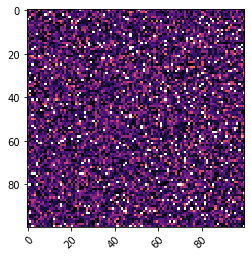

In [7]:
big = histmap(df, 100) #takes several minutes for 30k records

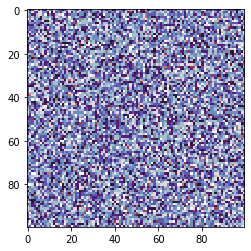

In [8]:
plt.imshow(big, cmap='twilight', interpolation='nearest')